In [1]:
# Import the necessary packages

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

In [5]:
os.listdir("C:\\Users\\Lenovo\\Desktop\\DR_project\\dataset\\archive\\colored_images")

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

In [6]:
os.listdir(os.path.join('C:\\Users\\Lenovo\\Desktop\\DR_project\\dataset\\archive\\train.csv', 'C:\\Users\\Lenovo\\Desktop\\DR_project\\dataset\\archive\\colored_images\\Mild'))

['0024cdab0c1e.png',
 '00cb6555d108.png',
 '0124dffecf29.png',
 '01b3aed3ed4c.png',
 '0369f3efe69b.png',
 '03e25101e8e8.png',
 '04ac765f91a1.png',
 '059bc89df7f4.png',
 '05a5183c92d0.png',
 '0684311afdfc.png',
 '06b71823f9cd.png',
 '07929d32b5b3.png',
 '07a1c7073982.png',
 '086d41d17da8.png',
 '09935d72892b.png',
 '0a3202889f4d.png',
 '0a61bddab956.png',
 '0ad7f631dedb.png',
 '0d310aba6373.png',
 '0dc031c94225.png',
 '0dce95217626.png',
 '0eb52045349f.png',
 '0f495d87656a.png',
 '0fb1053285cf.png',
 '101b9ebfc720.png',
 '107aea0d9289.png',
 '10f36b0239fb.png',
 '1116271db4ea.png',
 '111898ab463d.png',
 '12ce6a1a1f31.png',
 '12e3f5f2cb17.png',
 '13ab8db8c700.png',
 '15cc2aef772a.png',
 '172df1330a60.png',
 '17eff993386f.png',
 '18b06f56ab27.png',
 '194814669fee.png',
 '19722bff5a09.png',
 '19e350c7c83c.png',
 '1a03a7970337.png',
 '1b329a127307.png',
 '1bb0ddfe753a.png',
 '1c0cf251b426.png',
 '1c3a6b4449e9.png',
 '1d11794057ff.png',
 '1d674e2e32e0.png',
 '1df3e03a8f5f.png',
 '1e8a1fdee5b

In [7]:
# Check the number of images in the dataset
train = []
label = []


In [13]:
# os.listdir returns the list of files in the folder, in this case image class names
for i in os.listdir('C:\\Users\\Lenovo\\Desktop\\DR_project\\dataset\\archive\\colored_images'):
  train_class = os.listdir(os.path.join('C:\\Users\\Lenovo\\Desktop\\DR_project\\dataset\\archive\\colored_images', i))
  for j in train_class:
    img = os.path.join('C:\\Users\\Lenovo\\Desktop\\DR_project\\dataset\\archive\\colored_images', i, j)
    train.append(img)
    label.append(i)

print('Number of train images : {} \n'.format(len(train)))

Number of train images : 7324 



In [14]:
train

['C:\\Users\\Lenovo\\Desktop\\DR_project\\dataset\\archive\\colored_images\\Mild\\0024cdab0c1e.png',
 'C:\\Users\\Lenovo\\Desktop\\DR_project\\dataset\\archive\\colored_images\\Mild\\00cb6555d108.png',
 'C:\\Users\\Lenovo\\Desktop\\DR_project\\dataset\\archive\\colored_images\\Mild\\0124dffecf29.png',
 'C:\\Users\\Lenovo\\Desktop\\DR_project\\dataset\\archive\\colored_images\\Mild\\01b3aed3ed4c.png',
 'C:\\Users\\Lenovo\\Desktop\\DR_project\\dataset\\archive\\colored_images\\Mild\\0369f3efe69b.png',
 'C:\\Users\\Lenovo\\Desktop\\DR_project\\dataset\\archive\\colored_images\\Mild\\03e25101e8e8.png',
 'C:\\Users\\Lenovo\\Desktop\\DR_project\\dataset\\archive\\colored_images\\Mild\\04ac765f91a1.png',
 'C:\\Users\\Lenovo\\Desktop\\DR_project\\dataset\\archive\\colored_images\\Mild\\059bc89df7f4.png',
 'C:\\Users\\Lenovo\\Desktop\\DR_project\\dataset\\archive\\colored_images\\Mild\\05a5183c92d0.png',
 'C:\\Users\\Lenovo\\Desktop\\DR_project\\dataset\\archive\\colored_images\\Mild\\0684311af

In [15]:
label




['Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 

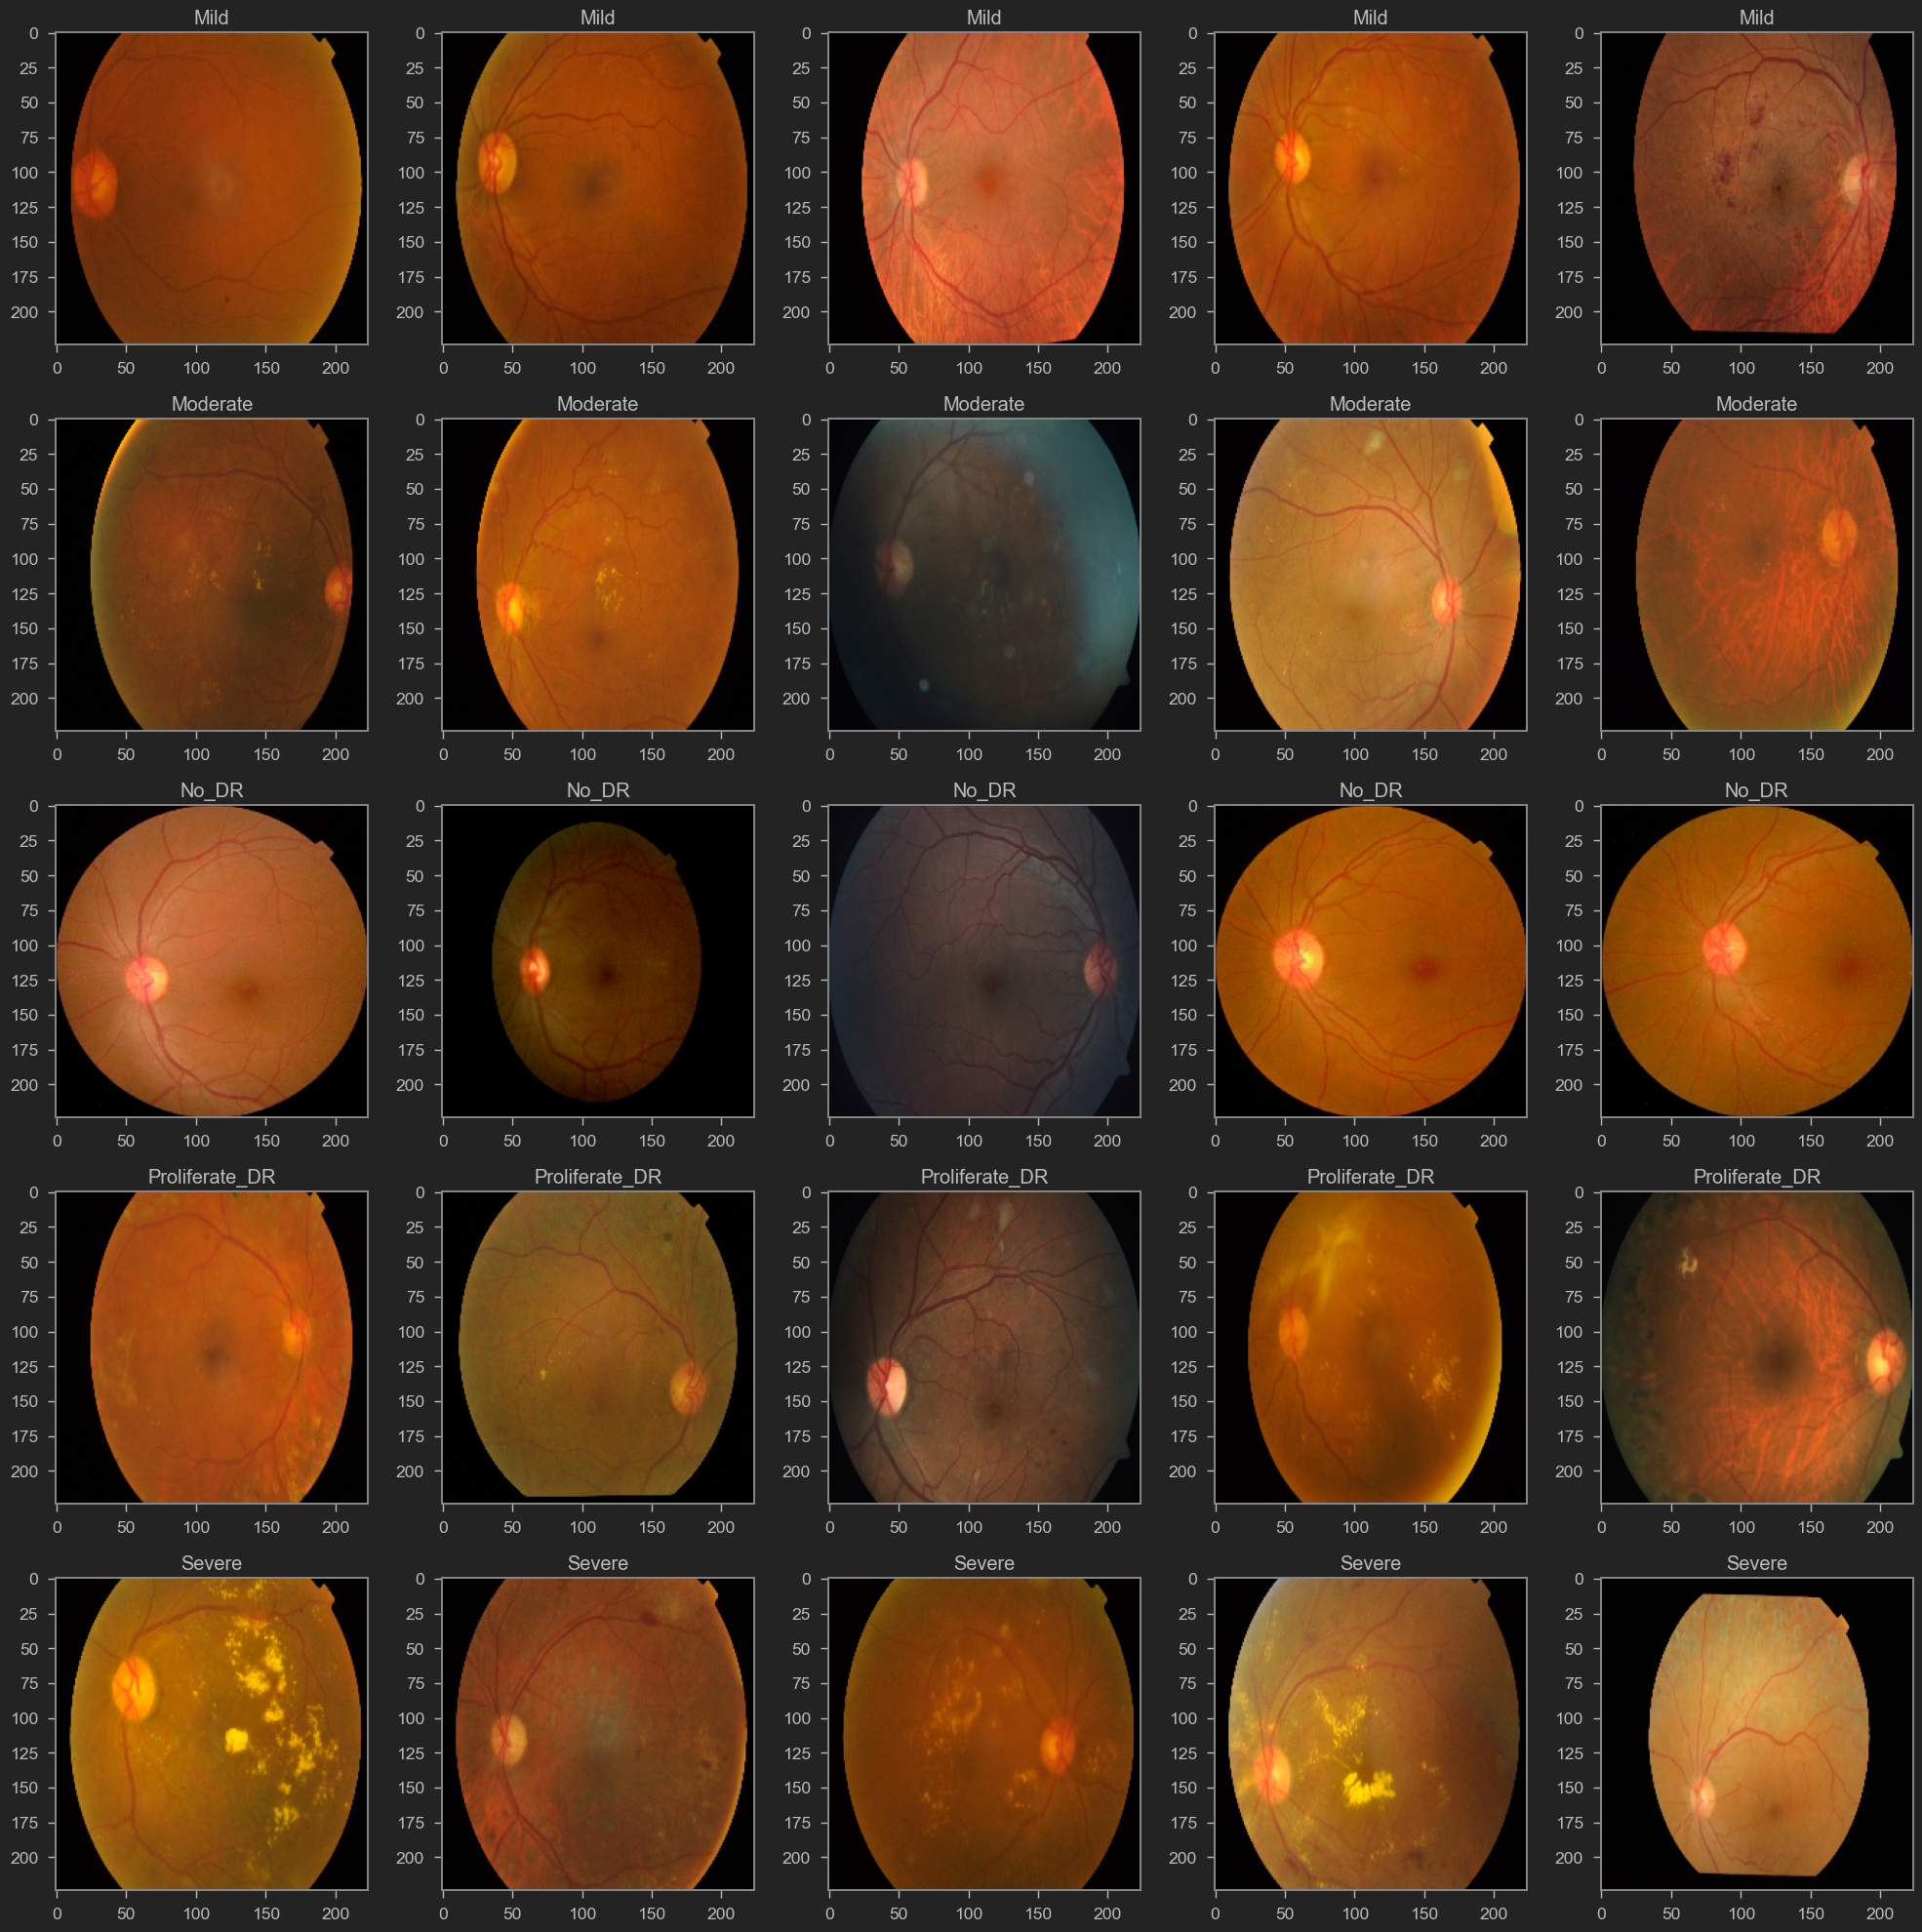

In [18]:
# Visualize 5 images for each class in the dataset

fig, axs = plt.subplots(5, 5, figsize = (20, 20))
count = 0
for i in os.listdir('C:\\Users\\Lenovo\\Desktop\\DR_project\\dataset\\archive\\colored_images'):
  # get the list of images in a given class
  train_class = os.listdir(os.path.join('C:\\Users\\Lenovo\\Desktop\\DR_project\\dataset\\archive\\colored_images', i))
  # plot 5 images per class
  for j in range(5):
    img = os.path.join('C:\\Users\\Lenovo\\Desktop\\DR_project\\dataset\\archive\\colored_images', i, train_class[j])
    img = PIL.Image.open(img)
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(img)  
  count += 1

fig.tight_layout()

In [20]:
# check the number of images in each class in the training dataset

No_images_per_class = []
Class_name = []
for i in os.listdir('C:\\Users\\Lenovo\\Desktop\\DR_project\\dataset\\archive\\colored_images'):
  train_class = os.listdir(os.path.join('C:\\Users\\Lenovo\\Desktop\\DR_project\\dataset\\archive\\colored_images', i))
  No_images_per_class.append(len(train_class))
  Class_name.append(i)
  print('Number of images in {} = {} \n'.format(i, len(train_class)))

Number of images in Mild = 370 

Number of images in Moderate = 999 

Number of images in No_DR = 1805 

Number of images in Proliferate_DR = 295 

Number of images in Severe = 193 



In [21]:
retina_df = pd.DataFrame({'Image': train,'Labels': label})
retina_df

Image  Labels
0     C:\Users\Lenovo\Desktop\DR_project\dataset\arc...    Mild
1     C:\Users\Lenovo\Desktop\DR_project\dataset\arc...    Mild
2     C:\Users\Lenovo\Desktop\DR_project\dataset\arc...    Mild
3     C:\Users\Lenovo\Desktop\DR_project\dataset\arc...    Mild
4     C:\Users\Lenovo\Desktop\DR_project\dataset\arc...    Mild
...                                                 ...     ...
7319  C:\Users\Lenovo\Desktop\DR_project\dataset\arc...  Severe
7320  C:\Users\Lenovo\Desktop\DR_project\dataset\arc...  Severe
7321  C:\Users\Lenovo\Desktop\DR_project\dataset\arc...  Severe
7322  C:\Users\Lenovo\Desktop\DR_project\dataset\arc...  Severe
7323  C:\Users\Lenovo\Desktop\DR_project\dataset\arc...  Severe

[7324 rows x 2 columns]

In [22]:
# Shuffle the data and split it into training and testing
retina_df = shuffle(retina_df)
train, test = train_test_split(retina_df, test_size = 0.2)

In [23]:

# Define input shape and number of classes
input_shape = (256, 256, 3)
num_classes = 5

In [24]:
# Create run-time augmentation on training and test dataset
# For training datagenerator, we add normalization, shear angle, zooming range and horizontal flip
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        validation_split = 0.15)

# For test datagenerator, we only normalize the data.
test_datagen = ImageDataGenerator(rescale = 1./255)# Creating datagenerator for training, validation and test dataset.



In [25]:
train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='training')

validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='validation')

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32)

Found 4981 validated image filenames belonging to 5 classes.
Found 878 validated image filenames belonging to 5 classes.
Found 1465 validated image filenames belonging to 5 classes.


In [26]:

# Define the AlexNet model
model = Sequential([
    # 1st Convolutional Layer
    Conv2D(filters=96, input_shape=(256,256,3), kernel_size=(11,11), strides=(4,4), padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),
    BatchNormalization(),

    # 2nd Convolutional Layer
    Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),
    BatchNormalization(),

    # 3rd Convolutional Layer
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    BatchNormalization(),

    # 4th Convolutional Layer
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    BatchNormalization(),

    # 5th Convolutional Layer
    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),
    BatchNormalization(),

    # Flatten the CNN output to feed it into a Dense layer
    Flatten(),

    # 1st Dense Layer
    Dense(units=4096, input_shape=(224*224*3,), activation='relu'),
    Dropout(0.5),

    # 2nd Dense Layer
    Dense(units=4096, activation='relu'),
    Dropout(0.5),

    # 3rd Dense Layer (Output Layer)
    Dense(units=5, activation='softmax')
])


In [27]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [28]:

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 96)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 30, 30, 96)        384       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 256)       0         
 g2D)                                                            
                                                        

In [29]:
#using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

#save the best model with lower validation lossmodel.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

checkpointer = ModelCheckpoint(filepath="weights.hdf5", verbose=1, save_best_only=True)

In [30]:
history = model.fit(train_generator, steps_per_epoch = train_generator.n // 32, epochs = 18, validation_data= validation_generator, validation_steps= validation_generator.n // 32, callbacks=[checkpointer , earlystopping])

Epoch 1/18
155/155 [==============================] - ETA: 0s - loss: 2.0678 - accuracy: 0.6023
Epoch 1: val_loss improved from inf to 1.71677, saving model to weights.hdf5


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


155/155 [==============================] - 564s 4s/step - loss: 2.0678 - accuracy: 0.6023 - val_loss: 1.7168 - val_accuracy: 0.2488
Epoch 2/18
155/155 [==============================] - ETA: 0s - loss: 0.9417 - accuracy: 0.6735
Epoch 2: val_loss improved from 1.71677 to 1.43856, saving model to weights.hdf5
155/155 [==============================] - 545s 4s/step - loss: 0.9417 - accuracy: 0.6735 - val_loss: 1.4386 - val_accuracy: 0.3472
Epoch 3/18
155/155 [==============================] - ETA: 0s - loss: 0.9750 - accuracy: 0.6700
Epoch 3: val_loss improved from 1.43856 to 0.86960, saving model to weights.hdf5
155/155 [==============================] - 546s 4s/step - loss: 0.9750 - accuracy: 0.6700 - val_loss: 0.8696 - val_accuracy: 0.6887
Epoch 4/18
155/155 [==============================] - ETA: 0s - loss: 1.0716 - accuracy: 0.6642
Epoch 4: val_loss did not improve from 0.86960
155/155 [==============================] - 534s 3s/step - loss: 1.0716 - accuracy: 0.6642 - val_loss: 0.922

In [31]:
# Evaluate the performance of the model
evaluate = model.evaluate(test_generator, steps = test_generator.n // 32, verbose =2)

print('Accuracy Test : {}'.format(evaluate[1]))

45/45 - 20s - loss: 0.7907 - accuracy: 0.7278 - 20s/epoch - 448ms/step
Accuracy Test : 0.7277777791023254


In [32]:
# Assigning label names to the corresponding indexes
labels = {0: 'Mild', 1: 'Moderate', 2: 'No_DR', 3:'Proliferate_DR', 4: 'Severe'}

In [33]:
# Loading images and their predictions 

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import cv2

prediction = []
original = []
image = []
count = 0

for item in range(len(test)):
  #code to open the image
  img= PIL.Image.open(test['Image'].tolist()[item])
  #resizing the image to (256,256)
  img = img.resize((256,256))
  #appending image to the image list
  image.append(img)
  #converting image to array
  img = np.asarray(img, dtype= np.float32)
  #normalizing the image
  img = img / 255
  #reshaping the image in to a 4D array
  img = img.reshape(-1,256,256,3)
  #making prediction of the model
  predict = model.predict(img)
  #getting the index corresponding to the highest value in the prediction
  predict = np.argmax(predict)
  #appending the predicted class to the list
  prediction.append(labels[predict])
  #appending original class to the list
  original.append(test['Labels'].tolist()[item])


1/1 [==============================] - 0s 50ms/step


In [34]:


#Getting the test accuracy 
score = accuracy_score(original,prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.7255972696245734


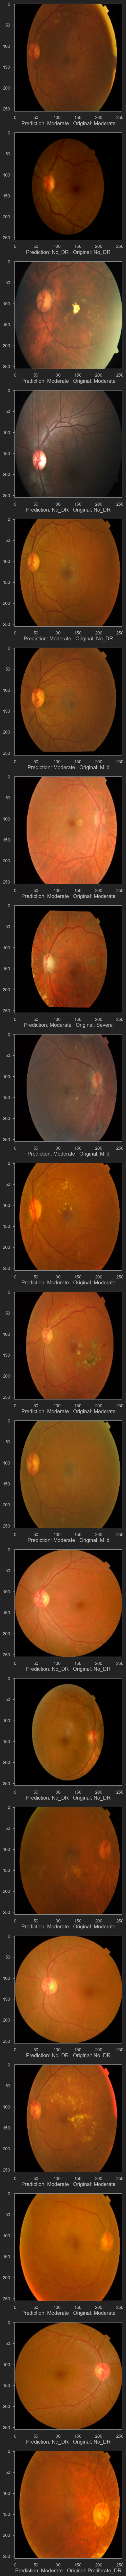

In [35]:
# Visualizing the results
import random
fig=plt.figure(figsize = (100,100))
for i in range(20):
    j = random.randint(0,len(image))
    fig.add_subplot(20, 1, i+1)
    plt.xlabel("Prediction: " + prediction[j] +"   Original: " + original[j])
    plt.imshow(image[j])
fig.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

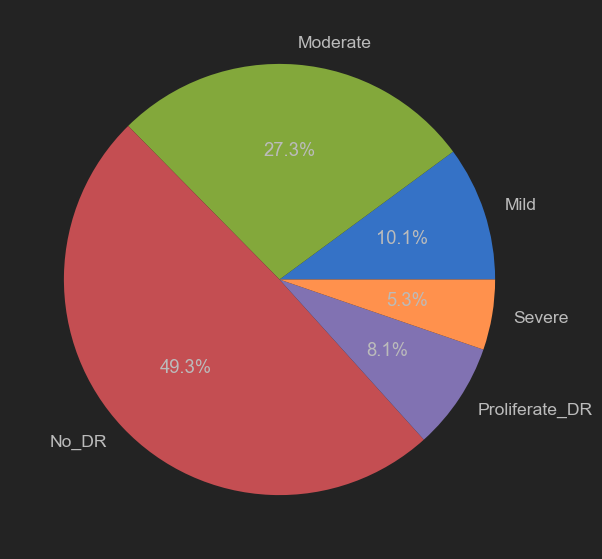

In [36]:
No_images_per_class
Class_name
fig1, ax1 = plt.subplots()
ax1.pie(No_images_per_class, labels = Class_name, autopct = '%1.1f%%')
plt.show



In [37]:
tf.keras.preprocessing.image.ImageDataGenerator(
      featurewise_center=False,
      samplewise_center=False,
      featurewise_std_normalization=False,
      samplewise_std_normalization=False,
      zca_whitening=False,
      zca_epsilon=1e-06,
      rotation_range=0,
      width_shift_range=0.0,
      height_shift_range=0.0,
      brightness_range=None,
      shear_range=0.0,
      zoom_range=0.0,
      channel_shift_range=0.0,
      fill_mode="nearest",
      cval=0.0,
      horizontal_flip=False,
      vertical_flip=False,
      rescale=None,
      preprocessing_function=None,
      data_format=None,
      validation_split=0.3,
      dtype=None)

In [38]:
# Print out the classification report
print(classification_report(np.asarray(original), np.asarray(prediction)))


                precision    recall  f1-score   support

          Mild       0.58      0.13      0.22       164
      Moderate       0.54      0.88      0.67       418
         No_DR       0.90      0.96      0.93       699
Proliferate_DR       0.00      0.00      0.00       102
        Severe       1.00      0.01      0.02        82

      accuracy                           0.73      1465
     macro avg       0.60      0.40      0.37      1465
  weighted avg       0.71      0.73      0.66      1465



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion_matrix')

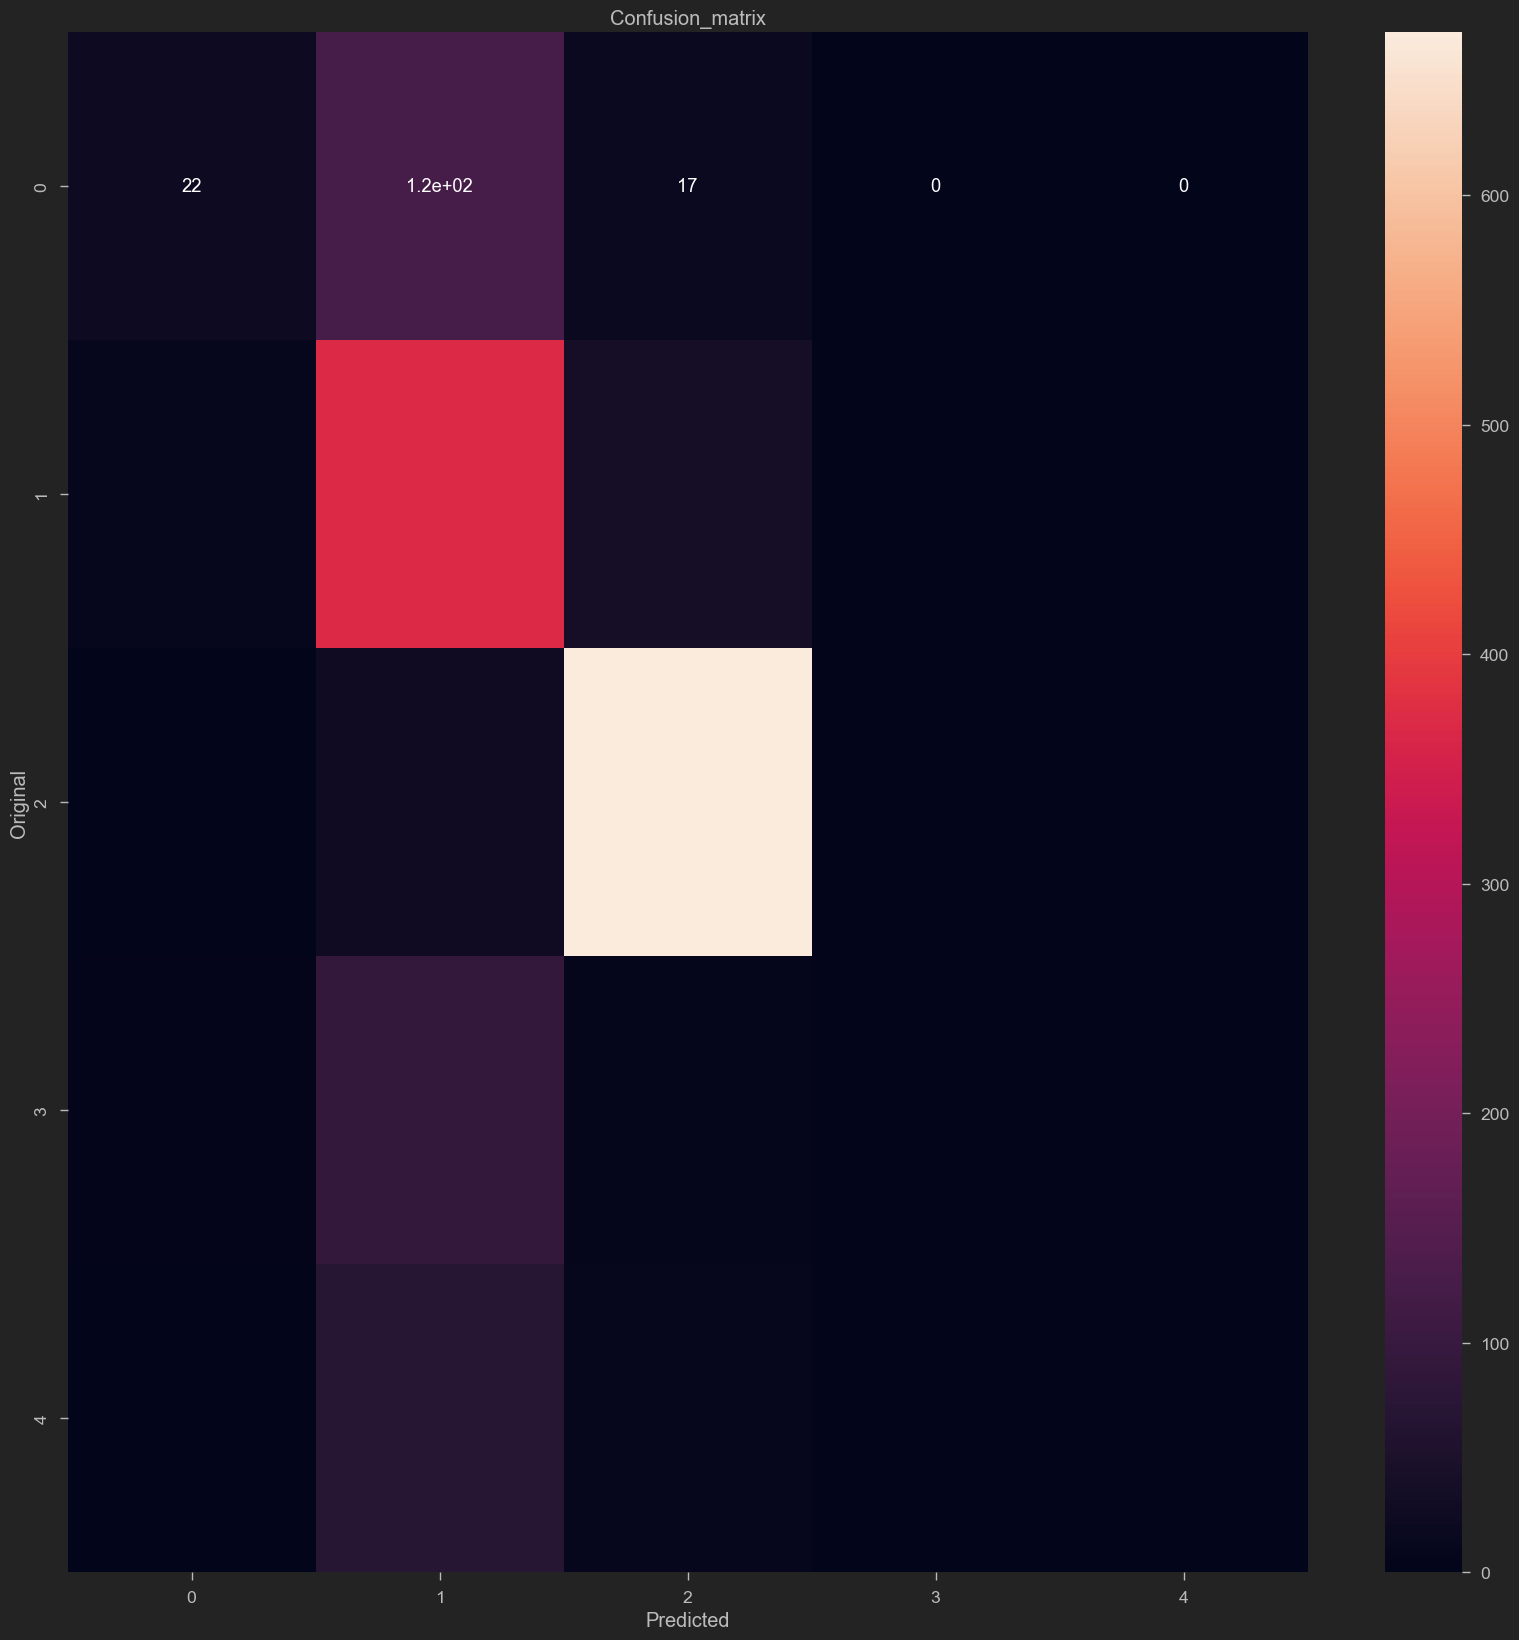

In [39]:

# plot the confusion matrix
plt.figure(figsize = (20,20))
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')
